In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
# Design a query to retrieve the last 12 months of precipitation data 
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).limit(365):
    print(row)

('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-22',)
('2017-08-22',)
('2017-08-22',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-20',)
('2017-08-20',)
('2017-08-20',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-12',)
('2017-08-12',)
('2017-08-12',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-09',)
('2017-08-09',)
('2017-08-09',)
('2017-08-08',)
('2017-08-08',)
('2017-08-08',)
('2017-0

Date from last date in data:  2016-08-23


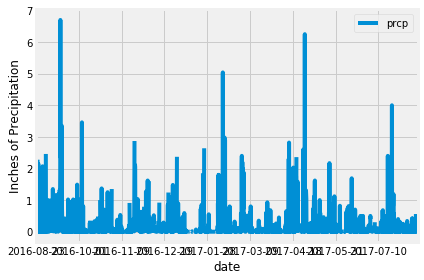

In [15]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Date from last date in data: ", year_ago)

# Perform a query to retrieve the data and precipitation scores
# filter by stations and set specific time, get count or sum of each month?   
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.plot()
plt.ylabel("Inches of Precipitation")
plt.tight_layout()
plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [17]:
# Design a query to show how many stations are available in this dataset?
total_m_stations = session.query(func.count(Measurement.station)).all()
total_s_stations = session.query(func.count(Station.station)).all()
print("Total Measurement Stations: ", total_m_stations)
print(f"There are {total_s_stations} types of stations")

Total Measurement Stations:  [(19550,)]
There are [(9,)] types of stations


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# search the syllabus for a reference
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

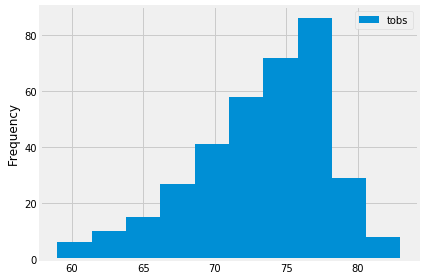

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Follow Similar Procedure to creating bar chart plot
results = session.query(Measurement.tobs).\
                       filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= year_ago).all()
                        
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist()
plt.tight_layout()                       

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start = dt.date(2017, 6, 24) - dt.timedelta(days=365)
end = dt.date(2017, 6, 30) - dt.timedelta(days=365)
t_data = calc_temps(start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"))
print(t_data)

[(71.0, 76.8, 81.0)]


In [28]:
# No Idea. Spent too long on

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
data = pd.DataFrame(t_data)
data.plot.bar()
plt.title('Trip Avg Temp')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

AssertionError: 0 columns passed, passed data had 3 columns

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-06-24'
end_date = '2017-06-30'

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.1), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.46), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.18000000000000002), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.14), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.12), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.07), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0)]
